# Import Tax Parcel df
Read in the tax parcel dataframe from Pierce County in order to isolate the latitude and longitude to make a clean import into the QGIS program.  Then use the QGIS program to select the coordinates within the pyroclastic flow zone and export those back to this notebook so they can be marked as in danger of being in the lahar flow area.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Tax_Parcels_Trimmed.csv')
df.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,Improvement_Value,Taxable_Value,Tax_Area_Code,Landuse_Description,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,0,0,471,UNKNOWN,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,1129400,1493400,471,SINGLE FAMILY DWELLING,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,0,251400,471,VACANT LAND UNDEVELOPED,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,0,33900,471,VACANT LAND UNDEVELOPED,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,563200,814400,471,SINGLE FAMILY DWELLING,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640


In [3]:
lat_long =pd.DataFrame()

lat_long['latitude'] =df['Latitude']

lat_long['longitude'] =df['Longitude']

In [6]:
lat_long.head()

,latitude,longitude
0,47.28867,-122.75325
1,47.28694,-122.75771
2,47.28678,-122.75416
3,47.28801,-122.75815
4,47.28806,-122.75508


In [7]:
lat_long.shape

(327319, 2)

In [8]:
lat_long.to_csv('../data/latlong.csv', index=False)

# Pyro-flow zone coordinates
Read in the coordinates within the pyroclastic flow zone isolated from the QGIS program; check the shape and mark the rows.

In [24]:
danger =pd.read_csv('../data/danger_parcels.csv')

In [25]:
danger.head()

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,latitude,longitude
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244
2,53,Y,NaN,NaN,1,D,47.08182,-122.68759
3,53,Y,NaN,NaN,1,D,47.08015,-122.69965
4,53,Y,NaN,NaN,1,D,47.07836,-122.70014


In [26]:
danger.shape

(28952, 8)

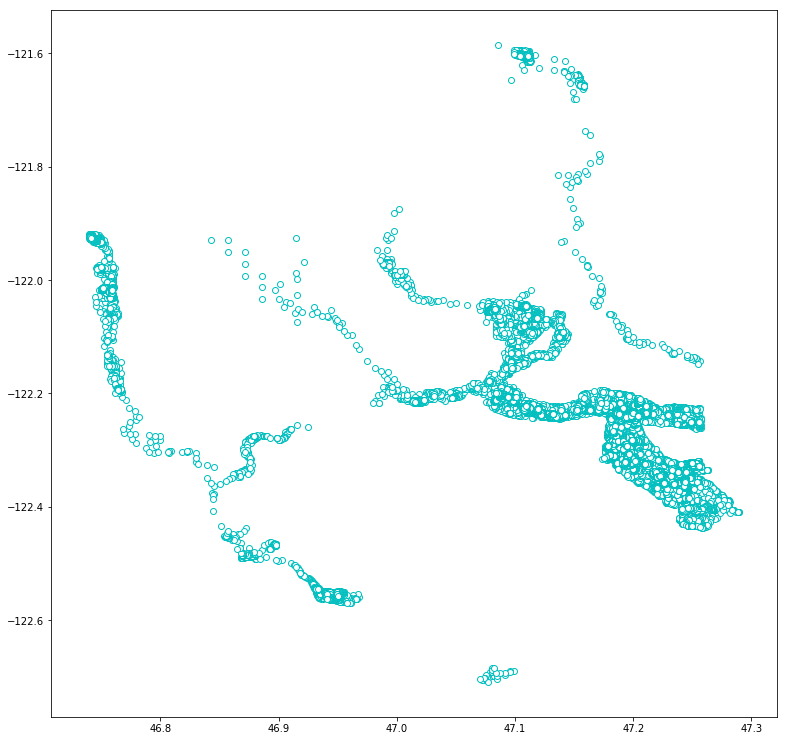

In [27]:
#check the shape of the lat/long to make sure the layer join worked.
plt.figure(figsize=(13, 13))
plt.scatter(danger['latitude'], danger['longitude'], c='w', edgecolor ='c');

In [13]:
danger['is_threatened'] = True

In [14]:
danger.head(2)

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,latitude,longitude,is_threatened
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482,True
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244,True


In [15]:
danger.shape

(28952, 9)

In [16]:
#rename to make column names identical for future merging
danger = danger.rename(columns={'latitude':'Latitude',
                       'longitude':'Longitude'})
danger.head(2)

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,Latitude,Longitude,is_threatened
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482,True
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244,True


In [17]:
# Remap all Y to 1

danger['CASE_1'] = danger['CASE_1'].map({'Y': 1})

danger['CASE_2'] = danger['CASE_2'].map({'Y': 1})

danger['CASE_3'] = danger['CASE_3'].map({'Y': 1})

In [18]:
print(danger.CASE_1.value_counts())
print(danger.CASE_2.value_counts())
print(danger.CASE_3.value_counts())

1.0    28928
Name: CASE_1, dtype: int64
1.0    22726
Name: CASE_2, dtype: int64
1.0    12
Name: CASE_3, dtype: int64


In [19]:
danger.isna().sum()

OBJECTID             0
CASE_1              24
CASE_2            6226
CASE_3           28940
SYMBOL               0
TIME_ZONE           49
Latitude            23
Longitude           23
is_threatened        0
dtype: int64

In [20]:
# drop useless columns
danger.drop(columns=['TIME_ZONE', 'SYMBOL', 'OBJECTID'], inplace=True)

In [21]:
danger.isna().sum()

CASE_1              24
CASE_2            6226
CASE_3           28940
Latitude            23
Longitude           23
is_threatened        0
dtype: int64

In [22]:
# All null values from lat/long come from the same rows, so the 
# dataframe is set to the rows where latitude are not null.
danger = danger[~danger["Latitude"].isna()]

In [23]:
danger.shape

(28929, 6)

In [24]:
danger.is_threatened.value_counts()

True    28929
Name: is_threatened, dtype: int64

In [25]:
# Nulls will be set to 0 after merging
danger.isna().sum()

CASE_1              22
CASE_2            6208
CASE_3           28927
Latitude             0
Longitude            0
is_threatened        0
dtype: int64

## Merge DataFrames

---

In [28]:
#import clean df
clean = pd.read_csv('../data/Tax_Parcels_Trimmed.csv')

In [29]:
clean.shape

(327319, 20)

In [30]:
danger["Latitude"] = round(danger["Latitude"], 5)
danger["Longitude"] = round(danger["Longitude"], 5)

clean["Latitude"] = round(clean["Latitude"], 5)
clean["Longitude"] = round(clean["Longitude"], 5)

In [31]:
#merge imported cleaned df and the cleaned 'threatened'df
threat = pd.merge(clean,danger, how='left', on=['Longitude', 'Latitude'])
threat.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,...,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length,CASE_1,CASE_2,CASE_3,is_threatened
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,...,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123,NaN,NaN,NaN,NaN
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,...,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072,NaN,NaN,NaN,NaN
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,...,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656,NaN,NaN,NaN,NaN
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,...,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915,NaN,NaN,NaN,NaN
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,...,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640,NaN,NaN,NaN,NaN


In [32]:
clean.isna().sum()

TaxParcelNumber            0
TaxParcelType              0
TaxParcelUnitType      15485
EditDate                   6
Delivery_Address          38
City_State                 0
Zipcode                 2802
Site_Address               0
Land_Acres                 0
Land_Value                 0
Improvement_Value          0
Taxable_Value              0
Tax_Area_Code              0
Landuse_Description        3
X_Coordinate               0
Y_Coordinate               0
Longitude                  0
Latitude                   0
Shape__Area                0
Shape__Length              0
dtype: int64

In [33]:
threat.isna().sum()

TaxParcelNumber             0
TaxParcelType               0
TaxParcelUnitType       15494
EditDate                    6
Delivery_Address           38
City_State                  0
Zipcode                  2803
Site_Address                0
Land_Acres                  0
Land_Value                  0
Improvement_Value           0
Taxable_Value               0
Tax_Area_Code               0
Landuse_Description         3
X_Coordinate                0
Y_Coordinate                0
Longitude                   0
Latitude                    0
Shape__Area                 0
Shape__Length               0
CASE_1                 298412
CASE_2                 305022
CASE_3                 328085
is_threatened          298390
dtype: int64

In [34]:
threat.shape

(328087, 24)

In [35]:
# for some reason gains 1000 rows.
threat['is_threatened'].value_counts()

True    29697
Name: is_threatened, dtype: int64

In [36]:
threat['is_threatened'].fillna(False, inplace = True)
threat['CASE_1'].fillna(value =0, inplace=True)
threat['CASE_2'].fillna(value=0, inplace=True)
threat['CASE_3'].fillna(value=0, inplace=True)

In [37]:
threat[['is_threatened', "CASE_1", "CASE_2", "CASE_3"]].isna().sum()

is_threatened    0
CASE_1           0
CASE_2           0
CASE_3           0
dtype: int64

In [38]:
#export merged dataframe
threat.to_csv('../data/danger_tax_robinson.csv', index=False)

# EDA

In [40]:
data = pd.read_csv('../data/danger_tax_robinson.csv')

In [42]:
#mask is_threatened to check
data['is_threatened'].value_counts()

False    298390
True      29697
Name: is_threatened, dtype: int64

In [43]:
allthreat = data[data['is_threatened'] ==True]

In [44]:
allthreat.shape

(29697, 24)

In [45]:
#replot the threatened observation to see why we lost some.
#plt.figure(figsize=(13, 13))
#plt.scatter(threat['Latitude'], threat['Longitude'], c='w', edgecolor ='c')
#plt.title('Latitude v Longitude');

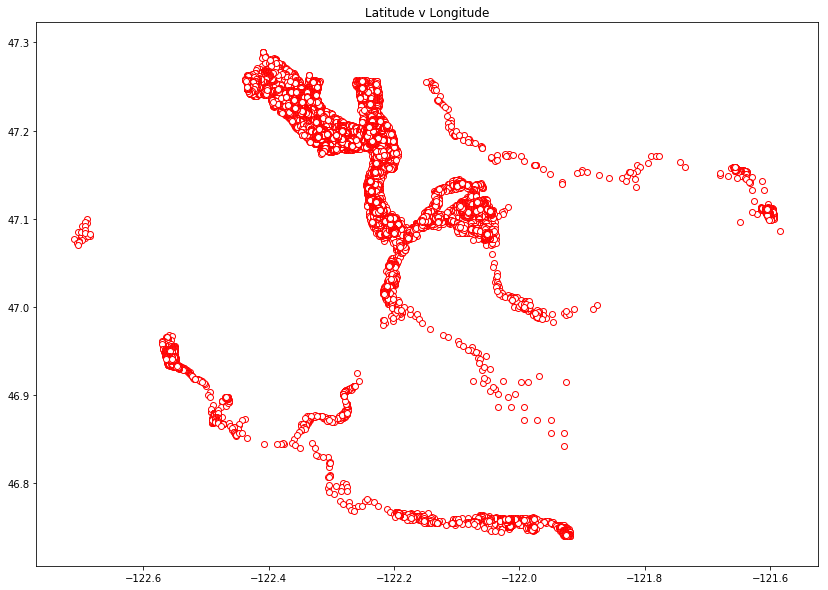

In [47]:
plt.figure(figsize=(14, 10))
plt.scatter(allthreat['Longitude'], allthreat['Latitude'], c='w', edgecolor ='r')
plt.title('Latitude v Longitude');

In [49]:
#mask case 1 to plot
case1 = data[data['CASE_1'] ==True]
case1.shape

(29675, 24)

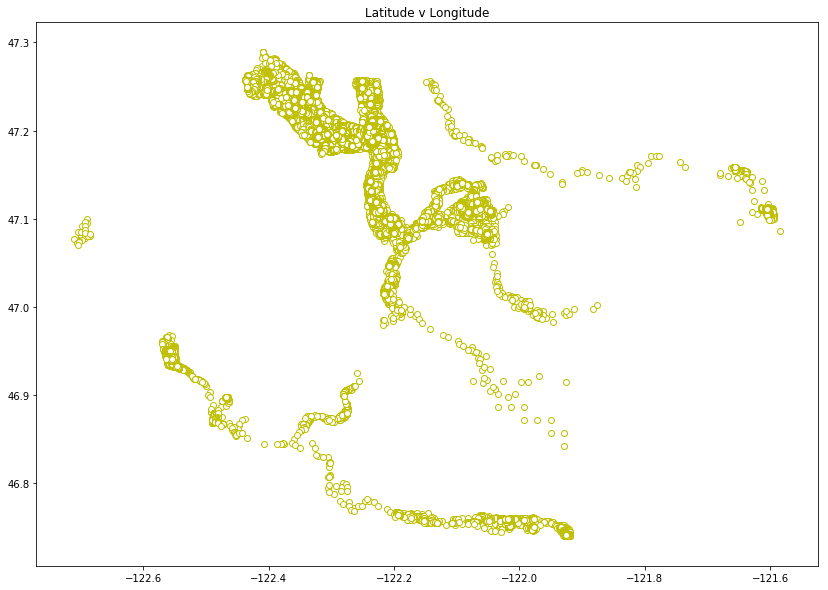

In [50]:
#try plotting the cases to visualize
plt.figure(figsize=(14, 10))
plt.scatter(case1['Longitude'], case1['Latitude'], c='w', edgecolor ='y')
plt.title('Latitude v Longitude');

In [51]:
#mask case 2 to plot
case2 = data[data['CASE_2'] ==True]
case2.shape

(23065, 24)

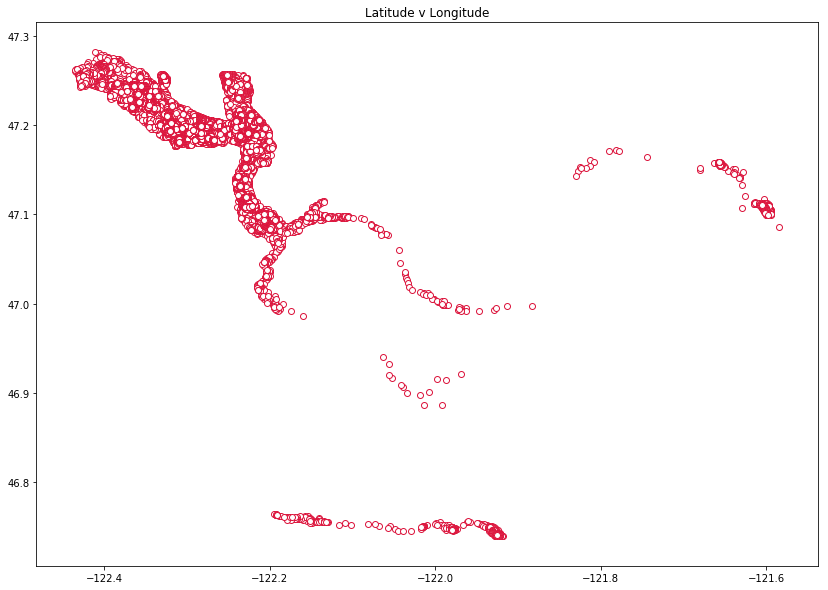

In [52]:
plt.figure(figsize=(14, 10))
plt.scatter(case2['Longitude'], case2['Latitude'], c='w', edgecolor ='crimson')
plt.title('Latitude v Longitude');

In [49]:
# case 3 has very few observations
case3 = data[data['CASE_3'] ==True]
case3.shape

(2, 24)

# Read in King County df
Read in the King County csv to isolate the longitude and latitude and run through the QGIS program to isolate the coordinated in the lahar flow zone

In [2]:
import pandas as pd
king =pd.read_csv('../data/kingvalues.csv')

In [3]:
king.head(2)

,Unnamed: 0,ADDR_FULL,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR
0,0,2108 B ST NW,98001,1624.0,AUBURN,AUBURN,47.327354,-122.231053,5115900.0,20709100.0,5115900.0,20709100.0
1,1,5 14TH ST NW,98001,4000.0,AUBURN,AUBURN,47.320530,-122.229260,672700.0,827600.0,672700.0,827600.0


In [61]:
king.shape

(38406, 12)

In [5]:
#isolate lat/long for import ease to QGIS
coords =pd.DataFrame()
coords['latitude'] =king['LAT']
coords['longitude'] =king['LON']

In [6]:
coords.shape

(38406, 2)

In [7]:
coords.to_csv('../data/king_coords.csv', index=False)

# Merge KC coordinates to df

In [13]:
king_danger =pd.read_csv('../data/king_int.csv')

In [14]:
king_danger.head()

,latitude,longitude,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE
0,47.165014,-121.980026,30,Y,NaN,NaN,1,D
1,47.165928,-121.985925,30,Y,NaN,NaN,1,D
2,47.168600,-121.990879,30,Y,NaN,NaN,1,D
3,47.166602,-121.992138,30,Y,NaN,NaN,1,D
4,47.163622,-121.975269,30,Y,NaN,NaN,1,D


In [15]:
king_danger.shape

(2828, 8)

In [18]:
#drop extra columns
king_danger.drop(columns=['TIME_ZONE', 'SYMBOL', 'OBJECTID'], inplace=True)

In [19]:
#nulls
king_danger.isna().sum()

latitude        0
longitude       0
CASE_1          0
CASE_2       1670
CASE_3       2828
dtype: int64

In [22]:
import matplotlib.pyplot as plt

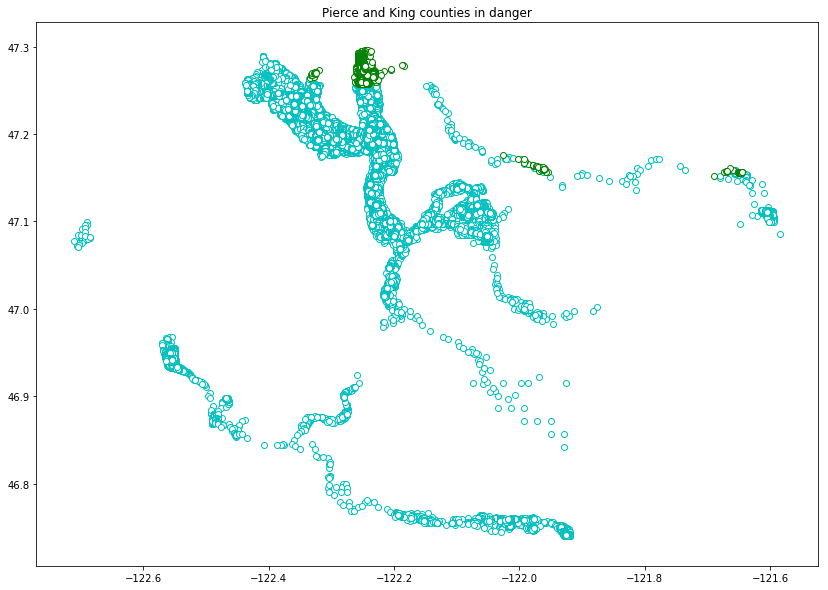

In [38]:
plt.figure(figsize=(14, 10))
plt.scatter(danger['longitude'], danger['latitude'], c='w', edgecolor ='c');
plt.scatter(king_danger['longitude'], king_danger['latitude'], c='w', edgecolor ='g');
plt.title('Pierce and King counties in danger');

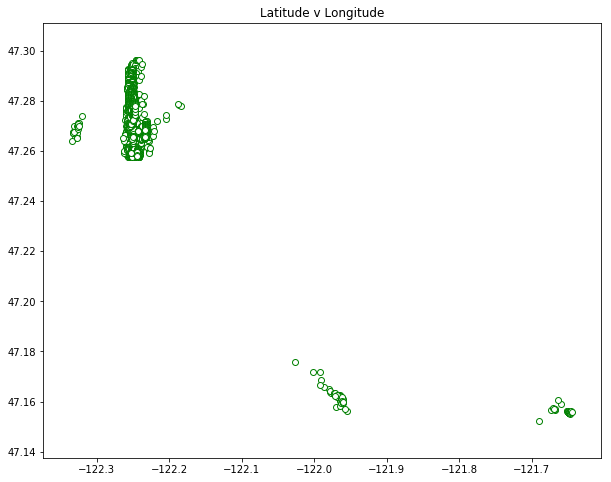

In [36]:
#plot to check shape
plt.figure(figsize=(10, 8))
plt.scatter(king_danger['longitude'], king_danger['latitude'], c='w', edgecolor ='g')
plt.title('Latitude v Longitude');

In [53]:
king_danger['is_threatened'] = True

In [55]:
king_danger.head(2)

,latitude,longitude,CASE_1,CASE_2,CASE_3,is_threatened
0,47.165014,-121.980026,Y,NaN,NaN,True
1,47.165928,-121.985925,Y,NaN,NaN,True


In [56]:
king_danger.shape

(2828, 6)

In [58]:
#drop cases, we're not using them now.
king_danger.drop(columns=['CASE_3', 'CASE_2', 'CASE_1'], inplace=True)

## Merge King County dfs
Add the df with the marked threatened rows to the original input King County dataframe.

In [59]:
# Rename latitude and longitude with LAT and LON so they can merge
king_danger = king_danger.rename(columns={'latitude':'LAT',
                       'longitude':'LON'})
king_danger.head(2)

,LAT,LON,is_threatened
0,47.165014,-121.980026,True
1,47.165928,-121.985925,True


In [66]:
# round again to stave off information loss
king_danger['LAT'] = round(king_danger['LAT'], 5)
king_danger['LON'] = round(king_danger['LON'], 5)

king['LAT'] = round(king['LAT'], 5)
king['LON'] = round(king['LON'], 5)

In [67]:
king.shape

(38406, 12)

In [68]:
#merge threatened king county marked columns with whole king co. df
king_threat = pd.merge(king, king_danger, how='left', on=['LON', 'LAT'])
king_threat.head()

,Unnamed: 0,ADDR_FULL,ZIP5,PLUS4,CTYNAME,POSTALCTYNAME,LAT,LON,APPRLNDVAL,APPR_IMPR,TAX_LNDVAL,TAX_IMPR,is_threatened
0,0,2108 B ST NW,98001,1624.0,AUBURN,AUBURN,47.32735,-122.23105,5115900.0,20709100.0,5115900.0,20709100.0,NaN
1,1,5 14TH ST NW,98001,4000.0,AUBURN,AUBURN,47.32053,-122.22926,672700.0,827600.0,672700.0,827600.0,NaN
2,2,9 14TH ST NW,98001,4000.0,AUBURN,AUBURN,47.32054,-122.23093,1324800.0,4961600.0,1324800.0,4961600.0,NaN
3,3,9 16TH ST NW,98001,1613.0,AUBURN,AUBURN,47.32371,-122.23141,682200.0,6711900.0,682200.0,6711900.0,NaN
4,4,8 16TH ST NW,98001,1616.0,AUBURN,AUBURN,47.32284,-122.23138,2810800.0,4377000.0,2810800.0,4377000.0,NaN


In [69]:
king_threat.shape

(38406, 13)

In [70]:
#With the rounding it's ony 3 off!  yay.
king_threat['is_threatened'].value_counts()

True    2825
Name: is_threatened, dtype: int64

In [72]:
#fill nulls and export full df
king_threat['is_threatened'].fillna(0, inplace=True)

In [73]:
king_threat['is_threatened'].value_counts()

0       35581
True     2825
Name: is_threatened, dtype: int64

In [74]:
king_threat.to_csv('../data/danger_king_robinson.csv', index=False)